# Lab 8a: AI Algorithms

Lab associated with Module 8a: AI Algorithms

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/0n/s19df3pj3515r5_vrmr7rst80000gn/T/ipykernel_15679/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

***

### Section 1: Computing Eigen-vectors and values using Power-iteration Algorithm

Let us see if we can implement power-iteration algorithm from the lectures, before we do that, let us see what already implemented functions gives us:

In [4]:
a = np.array([[1,2],[4,5],[5,8],[3,9],[4,2],[1,18],[7,8]])
b = np.array([[1,2],[4,5],[5,8],[3,9],[4,2],[1,18],[7,8]])
b

array([[ 1,  2],
       [ 4,  5],
       [ 5,  8],
       [ 3,  9],
       [ 4,  2],
       [ 1, 18],
       [ 7,  8]])

Let us see how basic linear algebra operations are performed, let us see transpose, dot-product, covariance, coefficient calucation, etc

In [5]:
a

array([[ 1,  2],
       [ 4,  5],
       [ 5,  8],
       [ 3,  9],
       [ 4,  2],
       [ 1, 18],
       [ 7,  8]])

In [6]:
# Testing variations between a and b after b is standardised
# Standardising the range of initial variables for b.

standardised_b = StandardScaler().fit_transform(b)
standardised_b

array([[-1.29232469, -1.07137936],
       [ 0.21538745, -0.47930129],
       [ 0.71795816,  0.11277677],
       [-0.28718326,  0.31013613],
       [ 0.21538745, -1.07137936],
       [-1.29232469,  2.08637034],
       [ 1.72309958,  0.11277677]])

In [7]:
# a Transposed 
a.T

array([[ 1,  4,  5,  3,  4,  1,  7],
       [ 2,  5,  8,  9,  2, 18,  8]])

In [8]:
# Testing variations between a and b after b is standardised
# Dot product of a and aT gives us a n x n martix. 

N = np.dot(standardised_b.T, standardised_b)
M = np.dot(a.T, a)
print(M, '\n')
print(N)

[[117 171]
 [171 566]] 

[[ 7.         -1.45946633]
 [-1.45946633  7.        ]]


In [9]:
# Testing code.
# Computes the eigenvalues and eigenvectors using 
# inbuilt NumPy function. One Vec for each dimension of M.

a_eigen_val, a_eigen_vec = np.linalg.eig(M)
b_eigen_val, b_eigen_vec = np.linalg.eig(N)

# Sort values from largest to smallest.
# a
idx = np.argsort(a_eigen_val, axis=0)[::-1]
a_sorted_eig_vectors = a_eigen_vec[:, idx]
# b
idx = np.argsort(b_eigen_val, axis=0)[::-1]
b_sorted_eig_vectors = b_eigen_vec[:, idx]

print(f'Sorted Eigenvalues for a: {a_eigen_val[idx]}\nEigenvectors:\n{a_sorted_eig_vectors}\n')
print(f'Sorted Eigenvalues for b: {b_eigen_val[idx]}\nEigenvectors:\n{b_sorted_eig_vectors}\n')
print('Note the results of the above, the same original input arrays. Array a was not standardised and array b was.')

Sorted Eigenvalues for a: [ 59.2921865 623.7078135]
Eigenvectors:
[[-0.31975533 -0.94750015]
 [-0.94750015  0.31975533]]

Sorted Eigenvalues for b: [8.45946633 5.54053367]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Note the results of the above, the same original input arrays. Array a was not standardised and array b was.


In [10]:
# Calculates the Pearson product-moment correlation coefficients.
# Returns the correlation coefficient matrix of the variables.
np.corrcoef(a.T)

array([[ 1.        , -0.20849519],
       [-0.20849519,  1.        ]])

In [11]:
# Even though b is standardised the results are the same as a.
np.corrcoef(standardised_b.T)

array([[ 1.        , -0.20849519],
       [-0.20849519,  1.        ]])

In [12]:
# A transposed 
print(a.T, '\n')
# Estimates a covariance matrix.
print(np.cov(a.T), '\n')
print(np.cov(standardised_b.T), '\n')

[[ 1  4  5  3  4  1  7]
 [ 2  5  8  9  2 18  8]] 

[[ 4.61904762 -2.45238095]
 [-2.45238095 29.95238095]] 

[[ 1.16666667 -0.24324439]
 [-0.24324439  1.16666667]] 



In [13]:
# New Array
a = np.array([[1,2],[2,1],[3,4],[4,3]])

In [14]:
m, n = a.shape
print('Shape:', m, 'x', n)

Shape: 4 x 2


First take on power Iteration algorithm for computing Eigen-vectors and values

In [15]:
# Displays the inner workings of the function. 

def power_iteration_explore(A, num_simulations):
    print(f'A:\n{A}')
    x_k = np.random.rand(A.shape[1]) 
    print(f'X_k:\n{x_k}\nFor Loop:\n')
    for _ in range(num_simulations):
        print(f'\ni={_}')
        x_k1 = np.dot(A, x_k) # Calculate the matrix vector dot product.
        print(f' X_k1:\n{x_k1}')
        # calculate the norm
        x_k1_norm = np.linalg.norm(x_k1) 
        print(f' x_k1_norm:\n{x_k1_norm}')
        # re normalize the vector
        x_k = x_k1 / x_k1_norm 
        print(f' x_k:\n{x_k}')
    
    return x_k

In [16]:
def power_iteration(A, num_simulations):
    # Choosing a random vector.
    x_k = np.random.rand(A.shape[1]) 

    for _ in range(num_simulations):
        # Calculate the matrix vector dot product.
        x_k1 = np.dot(A, x_k) 

        # calculate the norm (i.e. the vector magnitude)
        x_k1_norm = np.linalg.norm(x_k1) 

        # re normalize our vector
        x_k = x_k1 / x_k1_norm 
    
    return x_k

In [17]:
# Converting a into a square matrix 
M = np.dot(a.T, a)
M

array([[30, 28],
       [28, 30]])

In [18]:
m, n = M.shape
print(m, 'x', n)

2 x 2


In [19]:
# Power iteration retuning the first eigenvector

e1 = power_iteration(M, 10)

In [20]:
# eigenvector 1
e1

array([0.70710678, 0.70710678])

In [21]:
# Calculates the eigenvalue (vector length)
l1 = np.dot(e1.T, M).dot(e1)
print(l1, '\n')

# Reshape to column vector
e1 = e1.reshape(2,1)
print(e1)

58.00000000000001 

[[0.70710678]
 [0.70710678]]


In [22]:
# Removing e1 from the matrix to calc e2
M2 = M - l1 * np.matmul(e1, e1.T)

# Testing other methods of calculating the same.
T1 = M - l1 * np.dot(e1, e1.T)
T2 = M - l1 * (e1 @ e1.T)

print(f'M:\n{M}\nM2:\n{M2}\nT1:\n{T1}\nT2:\n{T2}')

M:
[[30 28]
 [28 30]]
M2:
[[ 1. -1.]
 [-1.  1.]]
T1:
[[ 1. -1.]
 [-1.  1.]]
T2:
[[ 1. -1.]
 [-1.  1.]]


In [23]:
# Caluclate eigenvector 2
e2 = power_iteration(M2, 10)

In [24]:
# Calculates the eigenvalue (vector length)
l2 = np.dot(e2.T, M2).dot(e2)
print(l2)
# Reshape to column vector
e2 = e2.reshape(2,1)
print(e2)

2.0000000000000013
[[ 0.70710678]
 [-0.70710678]]


## <font color='red'> Activity 1: Make sure you understand the content in this section, and write your detailed reflections. </font>
#### Use markdown to discuss and reflect on your understanding about the code of eigen vectors and power iteration in approximately 150 words

Looking over the code above, there are several Python and NumPy inbuilt functions used that calculate various matrix operations as I've commented. Some are just examples while others prepare a 2x2 matrix for the power iteration function. The power iteration function itself is quite simple and is composed of the following.

1.	Generates a random starting vector from the matrix passed (A) and stores it in x_k.
2.	Enters a for loop for the number of iterations passed, 10 in this instance. 
3.	Calculates the dot product of x_k and A producing a new vector storing it in x_k1.
4.	Calculates the magnitude of x_k1 storing it in x_k1_norm. 
5.	Re-normalises the random vector setting it equal to x_k1 / x_k1_norm. 

After the 10 iterations, the function converges on the eigenvector (0.7071068, 0.7071068).

We then reshape the returned eigenvaector and adjust the original matrix with * M2 = M - (l1 x np.matmul(e1, e1.T)) * essentially removing the vector to rerun the power iteration function on the adjusted matrix to extract the final vector ( 0.7071068, -0.7071068), 2 dimensional array means 2 eigenvectors. The returned vectors makes sense as they are orthogonal to each other. 

***

## <font color='red'> Activity 2: Wrap-up above code to make a generic function for computing Eigen-vectors and values. </font>

In [25]:
#### TODO ####
### Good Luck ###

from decimal import Decimal

def compute_eigenpairs(A):
    # Checking that we have a square matrix. 
    n, m = A.shape
    if n != m:
        print(f'{n}x{m} isn\'t & can\'t be converted to a square matrix.')
        return None
    
    # Choosing a random vector.
    x_k = np.random.rand(A.shape[1]) 
    count = 0
    
    # Declaration of variables, setting tolerance. 
    variance, prev_norm = 1, 1
    tolerance = Decimal(0.000000000001)
    e_values = np.array([])
    e_vectors = np.array([])

    # 1 loop for each dimension
    for i in range(n):
        # While values haven't converged.
        while abs(variance) > tolerance:
            # Calculate the matrix vector dot product.
            x_k1 = np.dot(A, x_k)
            # calculate the norm (i.e. the vector magnitude)
            x_k1_norm = np.linalg.norm(x_k1) 
            # Update the varience between eigenvalues. 
            variance =  Decimal(x_k1_norm - prev_norm)
            prev_norm = x_k1_norm # Set previous norm
            # re normalize our vector
            x_k = x_k1 / x_k1_norm 
        
        e = x_k.reshape(int(n),1) # Reshape the eigenvector
        l = np.dot(e.T, A).dot(e) # Calc the eigenvalue
        A = A - l * np.matmul(e, e.T) #Update the matrix

        e_values = np.append(e_values, l)
        e_vectors = np.append(e_vectors, x_k)
        variance = 1 # Reset variance
        
        x_k = np.random.rand(A.shape[1]) # Update the rand vector.
    
    e_vectors = e_vectors.reshape(n,n)
    
    return e_values, e_vectors


In [26]:
# Test case 1 - Using the original inputs of the example power iteration function. 

print(f' Original e1:\n{e1.T}\n Original e2:\n{e2}\n')

e_values, e_vectors = compute_eigenpairs(M)
print(f'Eigenvalues:\n{e_values}\nEigenvectors:\n{e_vectors}\n')

 Original e1:
[[0.70710678 0.70710678]]
 Original e2:
[[ 0.70710678]
 [-0.70710678]]

Eigenvalues:
[58.  2.]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]



In [27]:
# Test Case 2
T2 = np.array([2,3,1,7,5,9,6,6,2])
T2 = T2.reshape(3, 3)
print(T2, '\n')

t2_values, t2_vectors = compute_eigenpairs(T2)
print(f'Eigenvalues:\n{t2_values}\nEigenvectors:\n{t2_vectors}')

[[2 3 1]
 [7 5 9]
 [6 6 2]] 

Eigenvalues:
[13.47305838 -3.55421129 -0.91884709]
Eigenvectors:
[[ 0.25584947  0.79523251  0.54967836]
 [ 0.04542731 -0.99764876 -0.05131584]
 [-0.11004359  0.98363076 -0.14269178]]


***

## <font color='red'> Activity 3: Do PCA analysis on iris dataset </font>

In [28]:
#### TODO ####
### Good Luck ###
# Iris data set
# see e.g. wikipedia.org/wiki/Iris_flower_data_set
#
# measurements of 150 iris flowers
#   col.1: sepal length
#   col.2: sepal width
#   col.3: petal length
#   col.4: petal width
#   col.5: species (0: setosa, 1: versicolor, 2: virginica)

import pandas as pd
import matplotlib.pyplot as plt

columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
iris = pd.read_csv('iris_data', sep='[ ]', names=columns, engine='python')
iris_df = pd.DataFrame(iris)
iris_df.head()

iris[['Sepal Width', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']]

,Sepal Width,Sepal Width,Petal Length,Petal Width,Species
0,3.5,3.5,1.4,0.2,0
1,3.0,3.0,1.4,0.2,0
2,3.2,3.2,1.3,0.2,0
3,3.1,3.1,1.5,0.2,0
4,3.6,3.6,1.4,0.2,0
...,...,...,...,...,...
145,3.0,3.0,5.2,2.3,2
146,2.5,2.5,5.0,1.9,2
147,3.0,3.0,5.2,2.0,2
148,3.4,3.4,5.4,2.3,2


In [29]:
iris_df['Species'] = iris_df['Species'].replace([0], 'Setosa')
iris_df['Species'] = iris_df['Species'].replace([1], 'Versicolor')
iris_df['Species'] = iris_df['Species'].replace([2], 'Virginica')
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


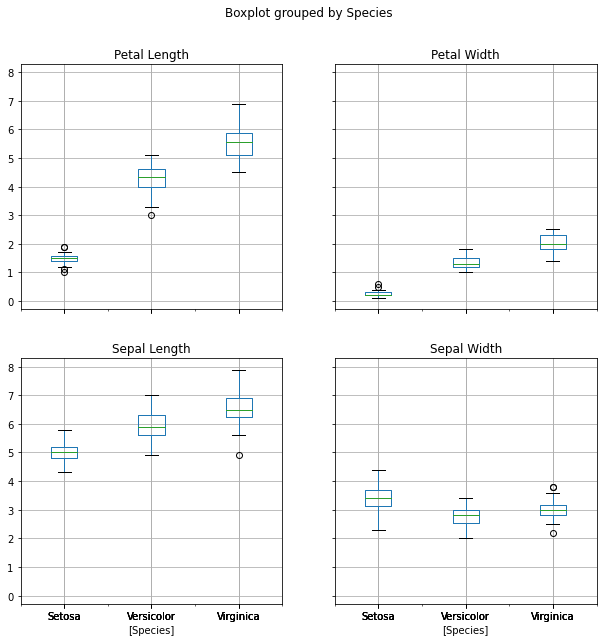

In [30]:
# Visualising how the data is distributed per species. 

iris_df.boxplot(by="Species", layout=(2, 2), figsize=(10, 10));

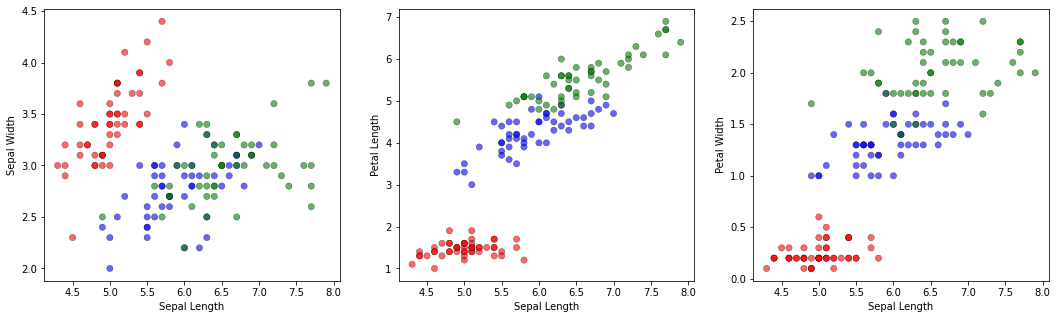

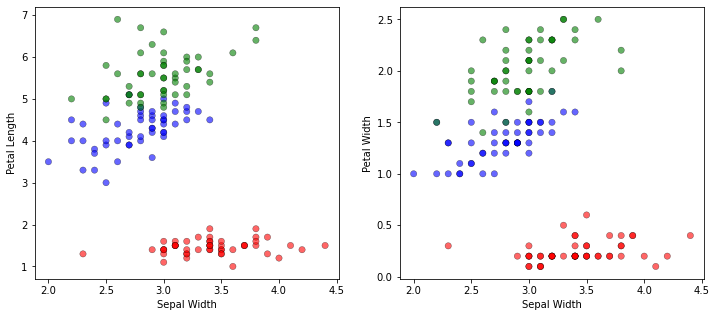

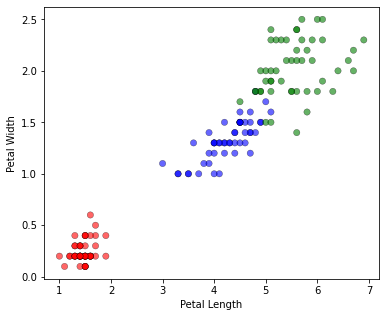

In [31]:
# Better visualisation how the data is distributed per species. 
X = iris_df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].to_numpy()
species = iris_df['Species'].to_numpy()
feature = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
colours = {'Setosa':'red', 'Versicolor':'blue', 'Virginica':'green'}
colour = np.vectorize(colours.get)(species)

for i in range(0,3):
    fig, ax = plt.subplots(ncols=3-i, figsize=(6*(3-i), 5)) 
    for j in range(i+1,4):
        x, y = X[:,i], X[:,j]
        x = x.reshape((len(x), 1))
        
        if 3-i==1:
            plt.scatter(x, y, s=40, c=colour, alpha=0.6, edgecolors='black', linewidths=0.4) 
            plt.xlabel(feature[i])
            plt.ylabel(feature[j])
        else:
            ax[j-1-i].scatter(x, y, s=40, c=colour, alpha=0.6, edgecolors='black', linewidths=0.4)
            ax[j-1-i].set_xlabel(feature[i])
            ax[j-1-i].set_ylabel(feature[j])
        
    plt.show()

In [32]:
# Extracting our key values. 
X = iris_df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].to_numpy()

# Standardising our Data
Xs = StandardScaler().fit_transform(X)

In [33]:
# Computing our Covariance matrix 
X_cov = np.cov(Xs.T)
print(X_cov)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [34]:
# Finding our 4 eigenpairs
xe_values, xe_vectors = compute_eigenpairs(X_cov)
print(f'Eigenvalues:\n{xe_values}\nEigenvectors:\n{xe_vectors}\n')

Eigenvalues:
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
[[ 0.52237163 -0.26335488  0.58125401  0.56561105]
 [ 0.3723183   0.92555653  0.02109471  0.06541571]
 [-0.72101682  0.24203283  0.14089225  0.63380141]
 [-0.26199564  0.12413483  0.80115428 -0.52354622]]



In [35]:
# Reordering the eigenvectors largest to smallest
index = np.argsort(xe_values, axis=0)[::-1]
sorted_xe_vectors = xe_vectors[:, index]

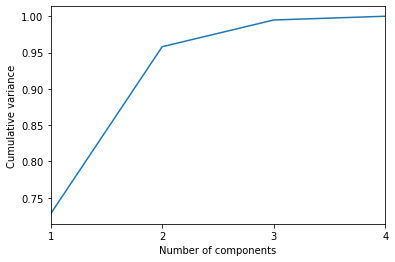

In [36]:
# Visualising the cumulative sum to determine how many eigenvectors to keep. 
cumsum = np.cumsum(xe_values[index]) / np.sum(xe_values[index])
x = range(1, len(cumsum) + 1)
plt.plot(x, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative variance")
plt.xticks(x)
plt.xlim(1, 4, 1);

In [37]:
# We can see from above two principal components provide us with over 95% of tha varience.

print(f'Variance accounted for by 1 Principal Components: {cumsum[0]}')
print(f'Variance accounted for by 2 Principal Components: {cumsum[1]}')
print(f'Variance accounted for by 3 Principal Components: {cumsum[2]}')
print(f'Variance accounted for by 4 Principal Components: {cumsum[3]}')

Variance accounted for by 1 Principal Components: 0.7277045209380117
Variance accounted for by 2 Principal Components: 0.9580097536148199
Variance accounted for by 3 Principal Components: 0.9948480731910937
Variance accounted for by 4 Principal Components: 1.0


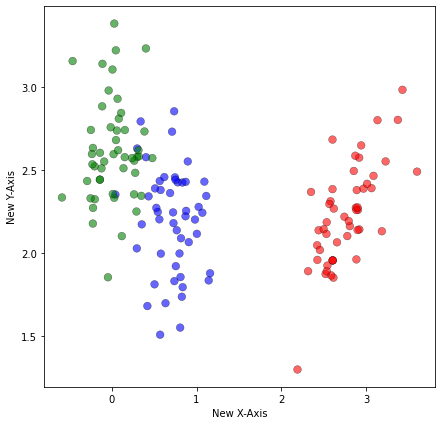

In [38]:
# Recasting the data along our new axis using the first 2 PC's (96% of variation).

X_final = np.dot(X, sorted_xe_vectors[:, :2])
x = X_final[:,0]
y = X_final[:,1]

# Realy not sure how to best plot this data.
plt.figure(figsize=(7, 7)) 
plt.scatter(x, y, s=60, c=colour, alpha=0.6, edgecolors='black', linewidths=0.4) 
plt.xlabel('New X-Axis')
plt.ylabel('New Y-Axis')
        
plt.show()

***

### Section 4: SVD and UV Decomposition

Let us read-in movie recommendation data, we will use this for SVD and UV decomposition algorithms

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

In [40]:
path = '' #/Users/nayyarz/OneDrive - Deakin University/Teaching/SIT320/Demos/data/'

In [41]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(path + 'ml-100k/u.data', sep='\t', names=header)

In [42]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [43]:
# Counts the number of unique users and items. 

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]

print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [44]:
# Splits the dataframe (25% of) into random train and test subsets.

train_data, test_data = train_test_split(df, test_size=0.25)

print('Train:', train_data.shape)
print('Test:', test_data.shape, '\n')
print('Train:\n', train_data[:5])
print('Test:\n', test_data[:5])

Train: (75000, 4)
Test: (25000, 4) 

Train:
        user_id  item_id  rating  timestamp
71989      714      284       3  892777438
30717      509      751       3  883590443
84916      399      139       3  882348153
23018      254     1443       4  887347382
51801      476      738       3  883364812
Test:
        user_id  item_id  rating  timestamp
36039      616      300       4  891224644
35432      478       93       4  889387871
48629      429      584       4  882385749
41315      622      165       5  882591938
31721      188      100       4  875074127


In [45]:
# -1 in the code is because user index starts from 1, but np matrix indices starts at 0

train_data_matrix = np.zeros((n_users, n_items)) # New training matrix (users x items)

# Populating the train_data_matrix with Ratings from train_data
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items)) # New testing matrix (users x items)

# Populating the test_data_matrix with Ratings from test_data
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

print(f'Train_data_matrix: {train_data_matrix.shape}')
print(f'Test_data_matris: {test_data_matrix.shape}\n')
print('Train_data_matrix:\n', train_data_matrix[:6])
print('Test_data_matris:\n', test_data_matrix[:6])

Train_data_matrix: (943, 1682)
Test_data_matris: (943, 1682)

Train_data_matrix:
 [[0. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]]
Test_data_matris:
 [[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# Calculating the sparsity of the values in the data frame.
sparsity = round(1.0-len(df)/float(n_users*n_items),4)

print('The sparsity level of MovieLens100K is ' + str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


In [47]:
# Helper function - Flattens the matrices into 
# a 1 dim array and returns the mean square error. 

def rmse(prediction, ground_truth):
    # collects the non zero elements into a 1 dimentional array.  
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    
    return np.sqrt(mean_squared_error(prediction, ground_truth))

Let us do SVD first (We will use SVD from scipy.sparse.linalg package, you are free to use your power-iteration based implementation)

In [48]:
# Single Value Decomposition

# Decompose the training data matrix into U Sig V.T
u, s, vt = svds(train_data_matrix, k = 5)

# Convert the vector S into a diagonal matrix 
s_diag_matrix = np.diag(s)

# Populates the prediction matrix with the prediction values 
# generated by multiplying the decomposed training data (U, Sigma, V.T)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print(f'U: {u.shape}\nSig: {s_diag_matrix.shape}\nV.T: {vt.shape}\n')

# Finally we take the mean square error of the test data and prediction data.
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

U: (943, 5)
Sig: (5, 5)
V.T: (5, 1682)

User-based CF RMSE: 2.748735642521135


## <font color='red'> Activity 4A: Make sure you understand the content of SVD and write your detailed reflections. </font>
#### Use markdown to discuss and reflect on your understanding about the code of SVD in approximately 150 words

Computing the SVD in Python.
After importing the data into a Pandas data frame, a sample representing 25% of the data is split into a training data matrix (75% of the split) and a test data matrix(25% of the split). 
1. Next, we generate two new matrices, one for the test data and one for the training data of size, number of users x the number of items. 
2. Those matrices are then sparsely populated with the rating values at the coordinates of the user id and the item id. 
3. Then we use the built-in SciPy SVD sparse decomposition function to decompose our training data into the UΣV^T. 
4. Once we have our decomposition we convert Sigma into a diagonal matrix as the built-in function returns a vector. 
5. Then, by multiplying (UΣ) V^T we can populate our prediction matrix with the estimated values. 
6. Finally, using the mean square error helper function, we flatten both our prediction data and testing data into one-dimensional arrays to calculate the mean square error which tells us how close our predicted values are. With zero being perfect, a score of 2.7 tells us we are close. 


Let us write the code for UV Decomposition

In [49]:
def UVDecomposition(R, P, Q, K, steps=10, alpha=0.002, beta=0.02): #alpha=0.0002
    # alpha is the SGD step size
    # beta is regularization parameter (aka lambda)
    Q = Q.T
    for step in range(steps): 
        print("Step: " + str(step))
        
        # Compute the Gradient first and update it
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j]) 
                    for k in range(K):
                        # I am commenting follwing two lines, please ignore them, they are basically implementing reularization in our framework
                        # Also ignore the value beta in this function (If you are curious talk to your tutor)
                        #P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        #Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k])
                    

        # Let us compute the error
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2) 
                    
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                        
        # If error gets down below a threshold, break out of iterations
        if e < 0.001: 
            break
    
    return P, Q.T

In [50]:
k = 10
P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)
print(f'P: {P.shape}\nQ: {Q.shape}\n')

P: (943, 10)
Q: (1682, 10)



In [51]:
nP, nQ = UVDecomposition(train_data_matrix, P, Q, k)

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9


In [52]:
X_pred = np.dot(nP, nQ.T)
print(f'nP: {nP.shape}\nQ: {nQ.shape}\n')
print('UV-Decomposition CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

nP: (943, 10)
Q: (1682, 10)

UV-Decomposition CF RMSE: 0.9662875399775444


## <font color='red'> Activity 5A: Compare UV and SVD decompositions. </font>
#### Use markdown to discuss and reflect on your understanding about the differences between SVD and UV decompositions in approximately 200 words

Although SVD and UV Decomposition can both be used to build a predictive recommender model, amongst other things, there are several differences between them. The most obvious is that while SVD decomposes our matrix of interest into three sub-matrices, UV decomposes into two. However, the difference in these matrices isn’t simply the number of sub-matrices, it’s how they’re defined and what they’re populated with that really separates these two methods.  

While we define the number of “concepts’ we’re interested in for a UV decomposition determining one of the main dimensions of our submatrices, SVD can calculate this itself based on eigendecomposition as we used in PCA. Although, in our use case we defined this number as 5 as we were using a function for a sparse data set which, in our case, was ideal. 

One last key difference between the sub-matrices is the orthogonality constraints imposed on SVD such that, U^T U=UU^T=I which is the same for V. This is not the case for UV decomposition and is a reason why there can be multiple local optima. 

Once we have the decomposition for our SVD and UV how we use them to build a predictive model varies greatly. The quickest and simplest in this instance is the SVD method. After preparing and decomposing our data into our sub-matrices we simply compute (UΣ) V^T which gives us our prediction matrix which we only need to flatten along with our data matrix to compute the relative mean square error. In our tests, the results of the RMSE gave us 2.7 which isn’t terrible. 

The slower, far more computationally expensive, but, in our examples more accurate was the UV Decomposition. This method seems to be better suited to sparsely populated matrices. Here our decomposition doesn’t provide us with ready populated linearly independent matrices, we need to randomly populate the matrix before passing them into the algorithm. The strength of this method is the application of the gradient decent algorithm on each element with a value greater than zero. The results clearly speak for themselves providing a RMSE of just 1.06.  

In summary, like anything, both have their strengths and weaknesses. The real trick is knowing when and how to use each which will take some practice that’s for sure.

## <font color='red'> Activity 5B: Running the code with many different test-cases. </font>
#### Write at least 3 test cases for each algorithm

In [53]:
#### TODO ####
### Good Luck ###

# SVD TEST CASE #1
t_size = 0.4

# Splits the dataframe (test_size = % of dataframe) into random train and test subsets.
train_data, test_data = train_test_split(df, test_size=t_size)
print(f'SVD\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}')

train_data_matrix = np.zeros((n_users, n_items)) # New training matrix (users x items)
# Populating the train_data_matrix with Ratings from train_data
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items)) # New testing matrix (users x items)
# Populating the test_data_matrix with Ratings from test_data
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

# Decompose the training data matrix into U Sig V.T
k_val = 5
u, s, vt = svds(train_data_matrix, k = k_val)
print(f' Running SVD with k of: {k_val}')

# Convert the vector S into a diagonal matrix 
s_diag_matrix = np.diag(s)

# Populates the prediction matrix with the prediction values 
# generated by multiplying the decomposed training data (U, Sigma, V.T)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print(f'\nU: {u.shape}\nSig: {s_diag_matrix.shape}\nV.T: {vt.shape}\n')

# Finally we take the mean square error of the test data and prediction data.
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

SVD
TEST SIZE: 0.4 of all data

 Train Data Shape: (60000, 4)
 Test Data Shape: (40000, 4)
 Running SVD with k of: 5

U: (943, 5)
Sig: (5, 5)
V.T: (5, 1682)

User-based CF RMSE: 2.914243482504345


In [54]:
# UV Test Case #1
print(f'UV Decomposition\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}\n')

k = 10
P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)
print(f'P: {P.shape}\nQ: {Q.shape}\n')

nP, nQ = UVDecomposition(train_data_matrix, P, Q, k)

X_pred = np.dot(nP, nQ.T)
print(f'nP: {nP.shape}\nQ: {nQ.shape}\n')
print('UV-Decomposition CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

UV Decomposition
TEST SIZE: 0.4 of all data

 Train Data Shape: (60000, 4)
 Test Data Shape: (40000, 4)

P: (943, 10)
Q: (1682, 10)

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
nP: (943, 10)
Q: (1682, 10)

UV-Decomposition CF RMSE: 0.9748948064695815


In [55]:
# SVD TEST CASE #3
t_size = 0.05

# Splits the dataframe (test_size = % of dataframe) into random train and test subsets.
train_data, test_data = train_test_split(df, test_size=t_size)
print(f'SVD\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}')

train_data_matrix = np.zeros((n_users, n_items)) # New training matrix (users x items)
# Populating the train_data_matrix with Ratings from train_data
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items)) # New testing matrix (users x items)
# Populating the test_data_matrix with Ratings from test_data
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

# Decompose the training data matrix into U Sig V.T
k_val = 5
u, s, vt = svds(train_data_matrix, k = k_val)
print(f' Running SVD with k of: {k_val}')

# Convert the vector S into a diagonal matrix 
s_diag_matrix = np.diag(s)

# Populates the prediction matrix with the prediction values 
# generated by multiplying the decomposed training data (U, Sigma, V.T)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print(f'\nU: {u.shape}\nSig: {s_diag_matrix.shape}\nV.T: {vt.shape}\n')

# Finally we take the mean square error of the test data and prediction data.
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

SVD
TEST SIZE: 0.05 of all data

 Train Data Shape: (95000, 4)
 Test Data Shape: (5000, 4)
 Running SVD with k of: 5

U: (943, 5)
Sig: (5, 5)
V.T: (5, 1682)

User-based CF RMSE: 2.4909246217319514


In [56]:
# UV Test Case #3
print(f'UV Decomposition\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}\n')

k = 10
P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)
print(f'P: {P.shape}\nQ: {Q.shape}\n')

nP, nQ = UVDecomposition(train_data_matrix, P, Q, k)

X_pred = np.dot(nP, nQ.T)
print(f'nP: {nP.shape}\nQ: {nQ.shape}\n')
print('UV-Decomposition CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

UV Decomposition
TEST SIZE: 0.05 of all data

 Train Data Shape: (95000, 4)
 Test Data Shape: (5000, 4)

P: (943, 10)
Q: (1682, 10)

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
nP: (943, 10)
Q: (1682, 10)

UV-Decomposition CF RMSE: 0.9634001275783526


In [57]:
# SVD TEST CASE #4
t_size = 0.1

# Splits the dataframe (test_size = % of dataframe) into random train and test subsets.
train_data, test_data = train_test_split(df, test_size=t_size)
print(f'SVD\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}')

train_data_matrix = np.zeros((n_users, n_items)) # New training matrix (users x items)
# Populating the train_data_matrix with Ratings from train_data
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data_matrix = np.zeros((n_users, n_items)) # New testing matrix (users x items)
# Populating the test_data_matrix with Ratings from test_data
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

# Decompose the training data matrix into U Sig V.T
k_val = 10
u, s, vt = svds(train_data_matrix, k = k_val)
print(f' Running SVD with k of: {k_val}')

# Convert the vector S into a diagonal matrix 
s_diag_matrix = np.diag(s)

# Populates the prediction matrix with the prediction values 
# generated by multiplying the decomposed training data (U, Sigma, V.T)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print(f'\nU: {u.shape}\nSig: {s_diag_matrix.shape}\nV.T: {vt.shape}\n')

# Finally we take the mean square error of the test data and prediction data.
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

SVD
TEST SIZE: 0.1 of all data

 Train Data Shape: (90000, 4)
 Test Data Shape: (10000, 4)
 Running SVD with k of: 10

U: (943, 10)
Sig: (10, 10)
V.T: (10, 1682)

User-based CF RMSE: 2.5011102545746238


In [58]:
# UV Test Case #4
print(f'UV Decomposition\nTEST SIZE: {t_size} of all data\n')
print(f' Train Data Shape: {train_data.shape}')
print(f' Test Data Shape: {test_data.shape}\n')

k = 10
P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)
print(f'P: {P.shape}\nQ: {Q.shape}\n')

nP, nQ = UVDecomposition(train_data_matrix, P, Q, k)

X_pred = np.dot(nP, nQ.T)
print(f'nP: {nP.shape}\nQ: {nQ.shape}\n')
print('UV-Decomposition CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

UV Decomposition
TEST SIZE: 0.1 of all data

 Train Data Shape: (90000, 4)
 Test Data Shape: (10000, 4)

P: (943, 10)
Q: (1682, 10)

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
nP: (943, 10)
Q: (1682, 10)

UV-Decomposition CF RMSE: 0.966222722127266


***

### Section 5: Computational Graphs

Let us start by defining the node first:

In [59]:
# Creating our calculation nodes. 

class Node:
    
    """A node in a computation graph."""
    def __init__(self, value, fun, parents):
        
        self.parents = parents # Tracks the parent
        self.value = value # Hold the value calculated from the children
        self.fun = fun # Holds the wrapped function 
        
    def __repr__(self): # The self printing function. 
        
        """A (very) basic string representation"""
        if self.value is None: 
            str_val = 'None'
        else:                  
            str_val = str(round(self.value,3))
        
        return "\n" + "Fun: " + str(self.fun) + " Value: "+ str_val + " Parents: " + str(self.parents) 

The following function adds operation/primitive to computation graph

In [60]:
from functools import wraps

# Takes a function as a parameter to be wrapped before its retuned.
def primitive(f): 
    # A decorator to create a signature-preserving wrapper function.  
    @wraps(f)
    def inner(*args, **kwargs):

        # The following function just check if we have a constant or a node in our graph, and returns accordingly
        def getval(o): 
            
            if type(o) == Node:
                return o.value
            else:
                return o
        
        if len(args):       
            argvals = [getval(o) for o in args]
        else:               
            argvals = args
            
        if len(kwargs):     
            kwargvals = dict([(k,getval(o)) for k,o in kwargs.items()])
        else:               
            kwargvals =  kwargs
         
        # get parents 
        l = list(args) + list(kwargs.values())
        parents = [o for o in l if type(o) == Node ]
        

        value = f(*argvals, **kwargvals)
        print("add", "'" + f.__name__ + "'", "to graph with value", value)
        
        return Node(value, f, parents)
    
    return inner

Let us add numpy add, multiply, divide, subtract, negative and exp functions

In [61]:
# Creating a few calculation nodes ready for use.
add_new = primitive(np.add)
mul_new = primitive(np.multiply)
div_new = primitive(np.divide)
sub_new = primitive(np.subtract)
neg_new = primitive(np.negative)
exp_new = primitive(np.exp)

# Adding a few additional calc nodes
log_new = primitive(np.log)
pow_new = primitive(np.power)

Let us build the first node

In [62]:
# Defining the empty root node. 

def start_node(value = None): 
    """A function to create an empty node to start off the graph"""
    fun, parents = lambda x: x, []
    return Node(value, fun, parents)

Let us test on some function

In [63]:
z = start_node(1.5)
t1 = mul_new(z, -1)
t2 = exp_new(t1)
t3 = add_new(t2, 1)
y = div_new(1,t3)
print("Final answer:", round(y.value,3))  # correct final output 


add 'multiply' to graph with value -1.5
add 'exp' to graph with value 0.22313016014842982
add 'add' to graph with value 1.22313016014843
add 'true_divide' to graph with value 0.8175744761936437
Final answer: 0.818


In [64]:
# We could wrap the above in a nice neat function

def function_z(value):
    """Computes: f(z) = 1/(1 + exp⁡(z * -1))"""
    z = start_node(value)
    t1 = mul_new(z, -1)
    t2 = exp_new(t1)
    t3 = add_new(t2, 1)
    t4 = div_new(1,t3)

    return t4.value

In [65]:
help(function_z)
print("\nFinal answer:", round(function_z(1.5), 3)) 

Help on function function_z in module __main__:

function_z(value)
    Computes: f(z) = 1/(1 + exp⁡(z * -1))

add 'multiply' to graph with value -1.5
add 'exp' to graph with value 0.22313016014842982
add 'add' to graph with value 1.22313016014843
add 'true_divide' to graph with value 0.8175744761936437

Final answer: 0.818


## <font color='red'> Activity 6: Make sure you understand the content in this section, and write your detailed reflections. </font>
#### Use markdown to discuss and reflect on your understanding about the code in this section in approximately 150 words

Reviewing the code for computational graph building we start by defining a simple calculation node class that initiates a node object containing three attributes, one to track the parent, one to hold the value calculated from and passed up from the child nodes, and a fun parameter that clearly holds the node's favourite things. Not really, the fun parameter holds the signature preserving wrapper function, for example, add, multiply, etc. 

Next, we use function tools imported from wraps to define a function called “primitive” that creates an alias for functions passed that will allow our nodes to incorporate the built-in functions of NumPy to perform their calculations. We then initiate a few functional/calculation nodes before defining an empty start node function to initiate our calculations. 

Moving on to our example computation graph, we have the following calculation being performed.

		f(z)=1/(1+exp⁡(z * -1))=0.818

Where z = 1.5

Which is calculated with the following graph build.
* z = start_node(1.5)
* t1 = mul_new(z, -1)
* t2 = exp_new(t1)
* t3 = add_new(t2, 1)

## <font color='red'> Activity 7A: Running the code with multi-variate computational graph (e.g., x2 + log(y) + 3z3). </font>

In [66]:
#### TODO ####
### Good Luck ###

def function_x_y_z(val_x, val_y, val_z):
    """Computes: f(x,y,z) = x^2 + log(y) + 3z3"""
    x = start_node(val_x)
    t1 = (pow_new(x, 2))
    if (x.value < 0): 
        t1 = t1.value*-1
    t2 = log_new(val_y)
    t3 = mul_new(3, val_z)
    t4 = mul_new(3, t3)
    t5 = add_new(t1, t2)
    f = add_new(t5, t4)
    
    return f.value

In [67]:
help(function_x_y_z)
print("\nFinal answer:", round(function_x_y_z(2, 3, 7), 3)) 

Help on function function_x_y_z in module __main__:

function_x_y_z(val_x, val_y, val_z)
    Computes: f(x,y,z) = x^2 + log(y) + 3z3

add 'power' to graph with value 4
add 'log' to graph with value 1.0986122886681098
add 'multiply' to graph with value 21
add 'multiply' to graph with value 63
add 'add' to graph with value 5.09861228866811
add 'add' to graph with value 68.09861228866811

Final answer: 68.099


## <font color='red'> Activity 7B: Running the code with many different test cases. </font>
#### Write at least 3 test cases

In [68]:
#### TODO ####
### Good Luck ###

help(function_x_y_z)
print("\nFinal answer:", round(function_x_y_z(12, 320, 72), 3)) 

Help on function function_x_y_z in module __main__:

function_x_y_z(val_x, val_y, val_z)
    Computes: f(x,y,z) = x^2 + log(y) + 3z3

add 'power' to graph with value 144
add 'log' to graph with value 5.768320995793772
add 'multiply' to graph with value 216
add 'multiply' to graph with value 648
add 'add' to graph with value 149.76832099579377
add 'add' to graph with value 797.7683209957938

Final answer: 797.768


In [69]:
print("\nFinal answer:", round(function_x_y_z(123, 4320, 272), 3)) 

add 'power' to graph with value 15129
add 'log' to graph with value 8.371010681238156
add 'multiply' to graph with value 816
add 'multiply' to graph with value 2448
add 'add' to graph with value 15137.371010681238
add 'add' to graph with value 17585.371010681236

Final answer: 17585.371


In [70]:
print("\nFinal answer:", round(function_x_y_z(-12, 4320, -22), 3)) 

add 'power' to graph with value 144
add 'log' to graph with value 8.371010681238156
add 'multiply' to graph with value -66
add 'multiply' to graph with value -198
add 'add' to graph with value -135.62898931876185
add 'add' to graph with value -333.62898931876185

Final answer: -333.629


In [71]:
print("\nFinal answer:", round(function_x_y_z(-1/4, 4320, 5/22), 3)) 

add 'power' to graph with value 0.0625
add 'log' to graph with value 8.371010681238156
add 'multiply' to graph with value 0.6818181818181818
add 'multiply' to graph with value 2.0454545454545454
add 'add' to graph with value 8.308510681238156
add 'add' to graph with value 10.3539652266927

Final answer: 10.354
